In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
dirname = os.path.dirname(os.path.abspath("__file__"))
filename = dirname +  '\data\A.csv'

In [5]:
df = pd.read_csv(filename)
w1 = df['w1']
w2 = df['w2']
h1 = df['h1']
h2 = df['h2']
W = df['W']
H = df['H']

In [6]:
n = df.shape[0]
data = np.zeros((n,2))

for i in range(n):
    data[i,0] = (w2[i] - w1[i]) / W[i]
    data[i,1] = (h2[i] - h1[i]) / H[i]

In [7]:
klebels5 = KMeans(n_clusters=5).fit_predict(data)
klebels9 = KMeans(n_clusters=9).fit_predict(data)
x = data[:,0]
y = data[:,1]

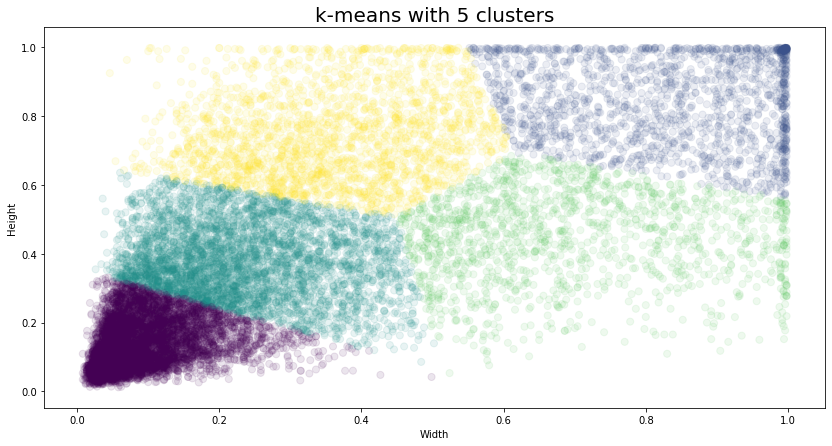

In [8]:
cmap = plt.cm.rainbow
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=klebels5,cmap='viridis',s=50, alpha=.1)
plt.title('k-means with 5 clusters', fontsize = 20)
plt.ylabel('Height')
plt.xlabel('Width')
plt.savefig('5 clusters')

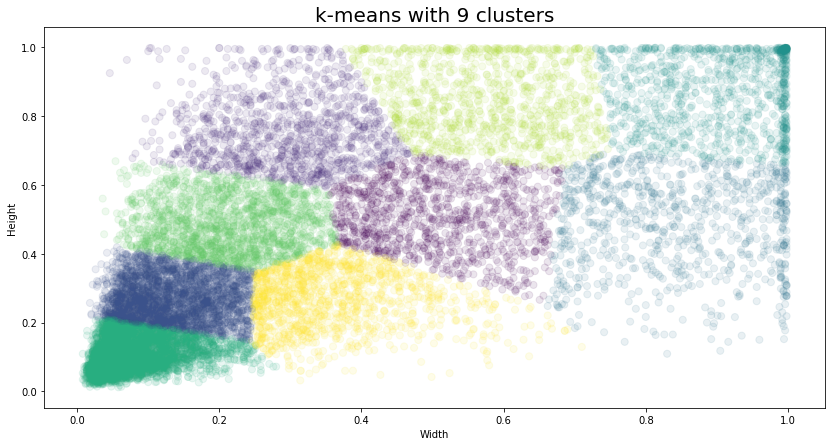

In [9]:
plt.figure(figsize=(14,7))
plt.scatter(x,y,c=klebels9,cmap='viridis',s=50, alpha=.1)
plt.title('k-means with 9 clusters', fontsize = 20)
plt.ylabel('Height')
plt.xlabel('Width')
plt.savefig('9 clusters')

In [10]:
def IoU(b1, b2):
    bx = min(b1[0], b2[0])
    by = min(b1[0], b2[0])
    iou = bx * by / (b1[0] * b2[1] + b1[1] * b2[0] - bx * by)
    return 1 - iou

def k_means(samples, num_clusters, distance, max_num_itr=100):
    
    #Initialization
    centroids = [samples[np.random.randint(len(samples))] for i in range(num_clusters)]
    sample_number = len(samples)
    centroids_number = len(centroids)
    for itr in range(max_num_itr):
        #Assignment step 
        sq_dists = np.sum(np.square(np.array([samples - centroid for centroid in centroids])), axis=2)
        sq_dists = np.zeros((sample_number,centroids_number))
        for i in range(sample_number):
            for j in range(centroids_number):
               sq_dists[i,j] = distance(samples[i], centroids[j])
        assignments = np.argmin(sq_dists, axis=1) + 1
        assigned_samples = [samples[assignments==i] for i in range (1,num_clusters+1)]
        
        #Update step
        new_centroids = []
        for i in range(0,num_clusters):
            if len(assigned_samples[i] > 0):
                new_centroids.append(np.mean(assigned_samples[i], axis=0))
            else:# I don't now it is true or not
                new_centroids.append(centroids[i])
                
        #Stoping condition 
        if(np.array_equal(new_centroids, centroids)):
            break
        centroids = new_centroids
    return centroids, assigned_samples, assignments, itr



In [11]:
centroids5, clusters5, plabels5, itr = k_means(data, 5, IoU, max_num_itr=10)
centroids9, clusters9, plabels9, itr = k_means(data, 9, IoU, max_num_itr=10)

Text(0.5, 0, 'Width')

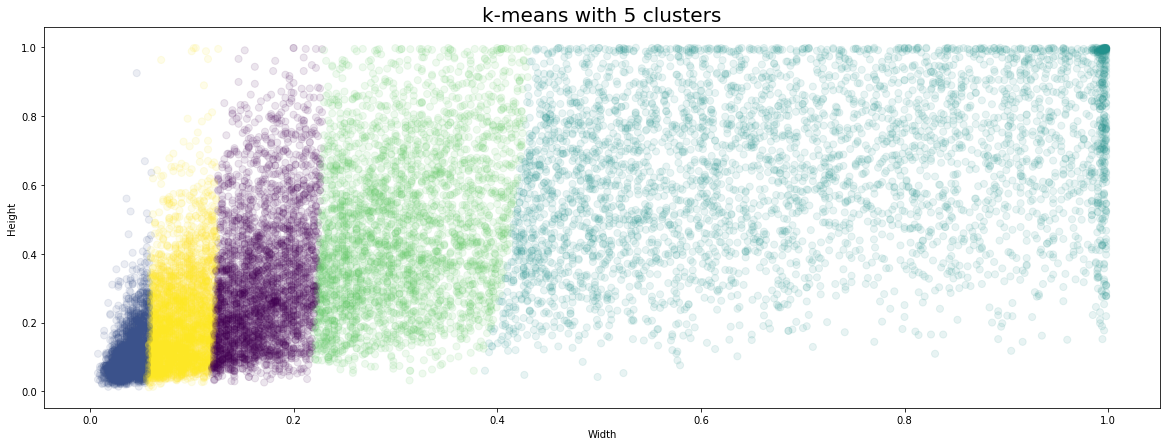

In [12]:
cmap = plt.cm.rainbow
plt.figure(figsize=(20,7))
plt.scatter(x,y,c=plabels5,cmap='viridis',s=50, alpha=.1)
plt.title('k-means with 5 clusters', fontsize = 20)
plt.ylabel('Height')
plt.xlabel('Width')

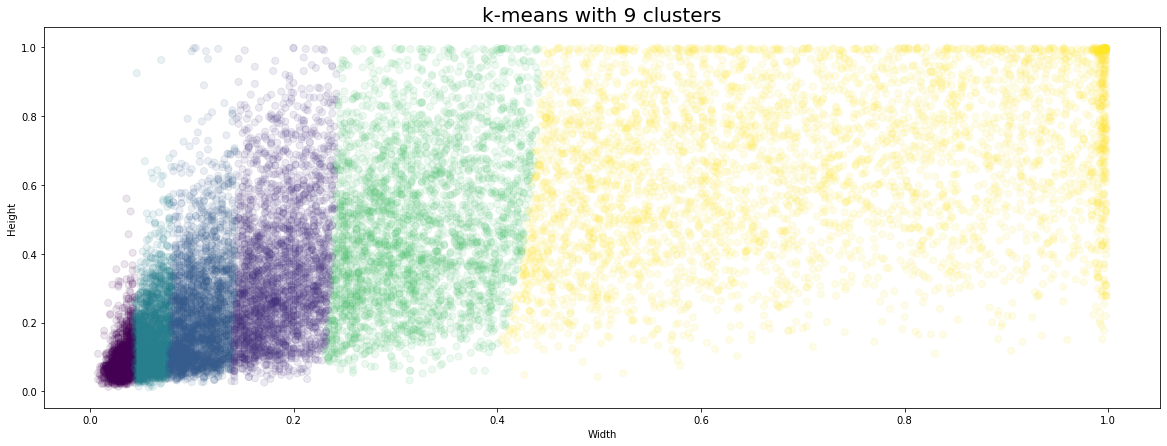

In [13]:
cmap = plt.cm.rainbow
plt.figure(figsize=(20,7))
plt.scatter(x,y,c=plabels9,cmap='viridis',s=50, alpha=.1)
plt.title('k-means with 9 clusters', fontsize = 20)
plt.ylabel('Height')
plt.xlabel('Width')
plt.savefig('9 clusters IoU')